In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("credit card.csv")
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [7]:
df= df.rename(columns={"default.payment.next.month": "payment"})

In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'payment'],
      dtype='object')

In [9]:
x = df.drop(["payment", "ID"], axis= 1)
y = df[["payment"]]

In [10]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,payment
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


<Axes: >

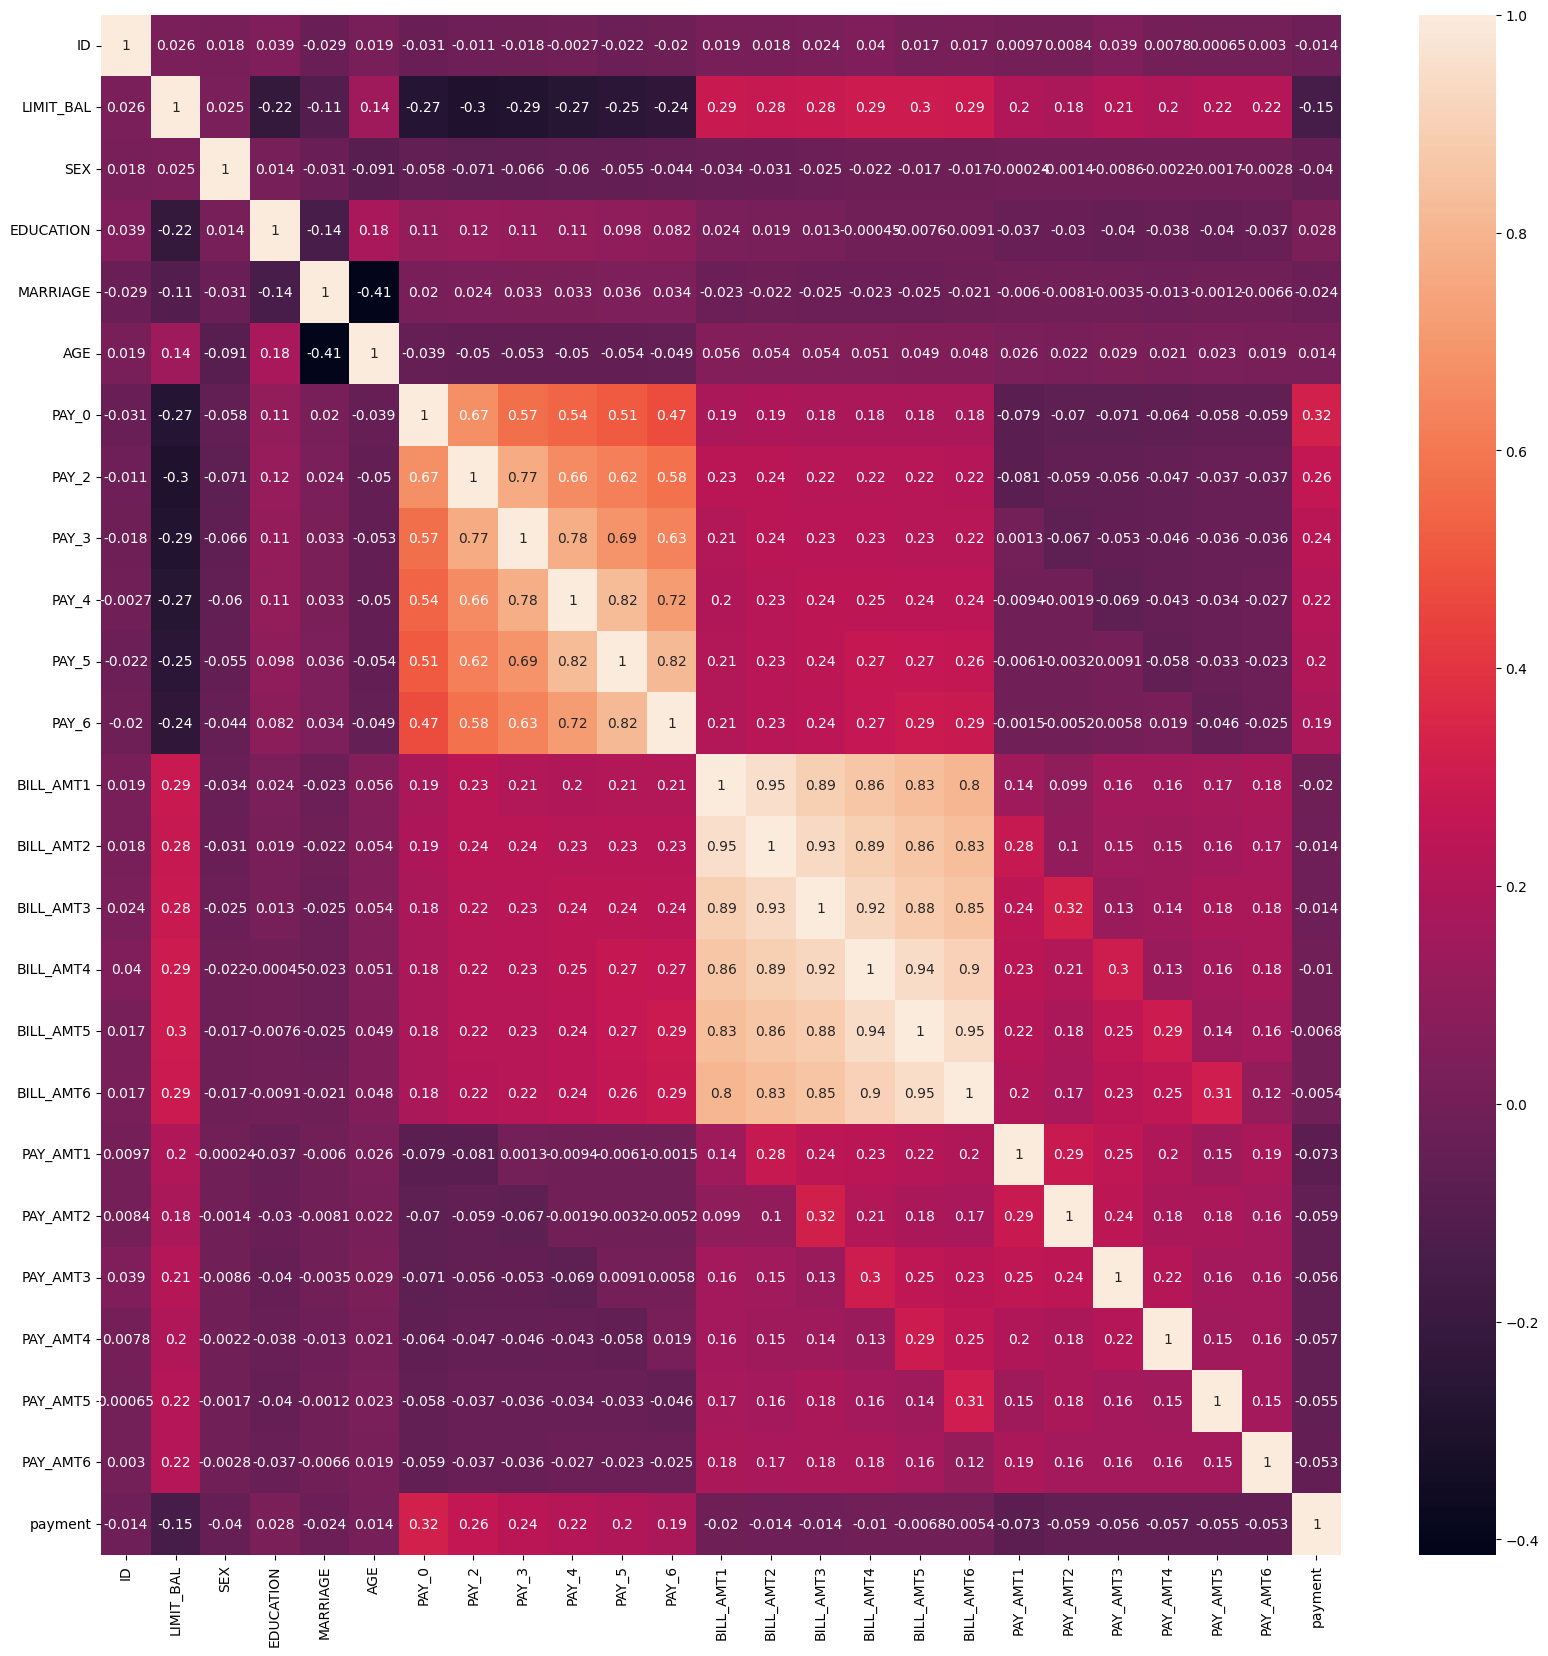

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)

# Wrapper method RFE with Loop

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [13]:
logis = LogisticRegression()

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Feature selection for different numbers of features
for n in [8, 10, 12]:
    print(f"\nRunning RFE for n_features_to_select = {n}")
    
    # Create RFE instance and fit the model
    rfe = RFE(logis, n_features_to_select=n)
    rfe.fit(x, y)
    
    # Print the score
    score = rfe.score(x, y)
    print(f"RFE Score: {score}")
    
    # Selected features
    selected_features = x.columns[rfe.support_]
    print(f"Selected Features ({n}): {list(selected_features)}")

    # Feature rankings
    print("Feature Rankings:")
    for feature, rank in zip(x.columns, rfe.ranking_):
        print(f"{feature}: {rank}")


Running RFE for n_features_to_select = 8
RFE Score: 0.8104666666666667
Selected Features (8): ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']
Feature Rankings:
LIMIT_BAL: 10
SEX: 1
EDUCATION: 1
MARRIAGE: 1
AGE: 2
PAY_0: 1
PAY_2: 1
PAY_3: 1
PAY_4: 1
PAY_5: 1
PAY_6: 3
BILL_AMT1: 11
BILL_AMT2: 16
BILL_AMT3: 13
BILL_AMT4: 14
BILL_AMT5: 9
BILL_AMT6: 15
PAY_AMT1: 4
PAY_AMT2: 5
PAY_AMT3: 8
PAY_AMT4: 6
PAY_AMT5: 7
PAY_AMT6: 12

Running RFE for n_features_to_select = 10
RFE Score: 0.8099333333333333
Selected Features (10): ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
Feature Rankings:
LIMIT_BAL: 8
SEX: 1
EDUCATION: 1
MARRIAGE: 1
AGE: 1
PAY_0: 1
PAY_2: 1
PAY_3: 1
PAY_4: 1
PAY_5: 1
PAY_6: 1
BILL_AMT1: 9
BILL_AMT2: 14
BILL_AMT3: 11
BILL_AMT4: 12
BILL_AMT5: 7
BILL_AMT6: 13
PAY_AMT1: 2
PAY_AMT2: 3
PAY_AMT3: 6
PAY_AMT4: 4
PAY_AMT5: 5
PAY_AMT6: 10

Running RFE for n_features_to_select = 12
RFE Score: 0.8089
Selected Featur

# Embedded method

In [18]:
emd = LogisticRegression(penalty= "l1", solver="liblinear")

In [19]:
emd.fit(x,y)

LogisticRegression(penalty='l1', solver='liblinear')

In [20]:
emd.score(x,y)

0.8110666666666667

In [21]:
coff = emd.coef_
coff

array([[-7.66762181e-07, -1.10097015e-01, -1.01993623e-01,
        -1.56708923e-01,  7.24606424e-03,  5.77135352e-01,
         8.26969431e-02,  7.20739393e-02,  2.38693040e-02,
         3.39703639e-02,  7.98787979e-03, -5.44891913e-06,
         2.27707173e-06,  1.41400930e-06, -2.06564639e-07,
         6.35697668e-07,  3.87297006e-07, -1.35975369e-05,
        -9.66180957e-06, -2.73219025e-06, -4.03867602e-06,
        -3.30391289e-06, -2.06836660e-06]])

In [22]:
for feature, coeff in zip(x.columns, coff[0]):
    print(feature, coeff)

LIMIT_BAL -7.667621812774799e-07
SEX -0.11009701451101005
EDUCATION -0.10199362344510256
MARRIAGE -0.15670892279405538
AGE 0.007246064238320972
PAY_0 0.5771353522948159
PAY_2 0.08269694305838851
PAY_3 0.07207393929808906
PAY_4 0.023869304032364508
PAY_5 0.033970363919146054
PAY_6 0.00798787978557836
BILL_AMT1 -5.448919125049721e-06
BILL_AMT2 2.2770717344534916e-06
BILL_AMT3 1.4140092962816433e-06
BILL_AMT4 -2.065646389142332e-07
BILL_AMT5 6.356976683248869e-07
BILL_AMT6 3.87297005981618e-07
PAY_AMT1 -1.3597536871401868e-05
PAY_AMT2 -9.661809570009105e-06
PAY_AMT3 -2.7321902518433655e-06
PAY_AMT4 -4.038676019702188e-06
PAY_AMT5 -3.3039128939888935e-06
PAY_AMT6 -2.068366596611964e-06


# Filter method Extra tree classifier

In [23]:
from sklearn.ensemble import ExtraTreesClassifier

In [24]:
extc= ExtraTreesClassifier()

In [25]:
extc.fit(x,y)

ExtraTreesClassifier()

In [26]:
extc.score(x,y)

0.9993

In [27]:
y.value_counts()

payment
0          23364
1           6636
Name: count, dtype: int64

In [28]:
extc.feature_importances_

array([0.06525145, 0.01217737, 0.03331588, 0.02129849, 0.06605364,
       0.09224166, 0.04804599, 0.03434879, 0.03164503, 0.03236058,
       0.03080336, 0.05073932, 0.04648597, 0.04517569, 0.04447742,
       0.0432902 , 0.04443312, 0.04358809, 0.04222299, 0.04187781,
       0.04135501, 0.04241975, 0.0463924 ])

In [29]:
feate = pd.DataFrame(extc.feature_importances_, columns=["feature"])

In [30]:
feate

,feature
0,0.065251
1,0.012177
2,0.033316
3,0.021298
4,0.066054
5,0.092242
6,0.048046
7,0.034349
8,0.031645
9,0.032361


In [31]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [32]:
col = pd.DataFrame(x.columns, columns=["colums"])

In [33]:
col

,colums
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE
5,PAY_0
6,PAY_2
7,PAY_3
8,PAY_4
9,PAY_5


In [34]:
new_data = pd.concat([col,feate], axis = 1)
new_data

,colums,feature
0,LIMIT_BAL,0.065251
1,SEX,0.012177
2,EDUCATION,0.033316
3,MARRIAGE,0.021298
4,AGE,0.066054
5,PAY_0,0.092242
6,PAY_2,0.048046
7,PAY_3,0.034349
8,PAY_4,0.031645
9,PAY_5,0.032361


In [35]:
new1=new_data.nlargest(10, "feature" )
new1

,colums,feature
5,PAY_0,0.092242
4,AGE,0.066054
0,LIMIT_BAL,0.065251
11,BILL_AMT1,0.050739
6,PAY_2,0.048046
12,BILL_AMT2,0.046486
22,PAY_AMT6,0.046392
13,BILL_AMT3,0.045176
14,BILL_AMT4,0.044477
16,BILL_AMT6,0.044433


<Axes: >

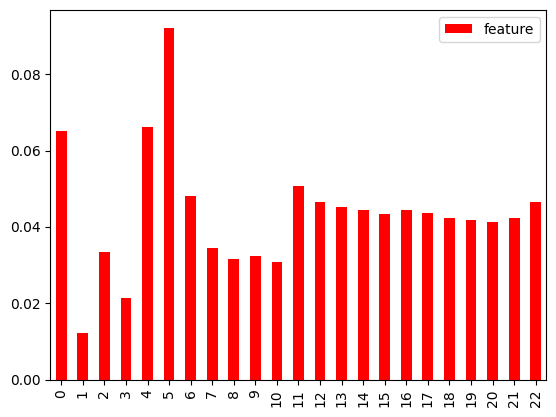

In [50]:
new_data.plot(kind ="bar" , color = "r")

<Axes: >

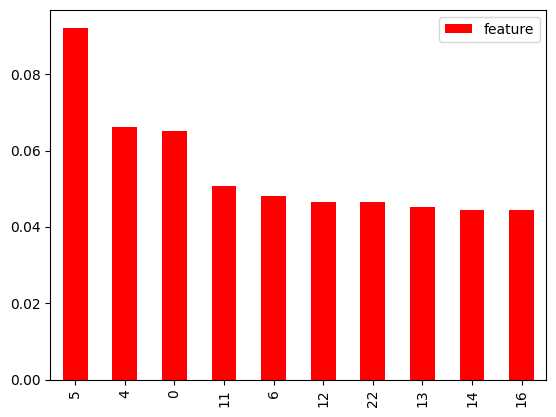

In [51]:
new1.plot(kind ="bar" , color = "r")

# Create new data frame only with the selected column 

In [36]:
selected_columns = ['PAY_0', 'AGE', 'LIMIT_BAL', 'BILL_AMT1', 'PAY_2',
                    'BILL_AMT2', 'PAY_AMT6', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT6']

In [37]:
df_selected = pd.concat([x[selected_columns], y], axis=1)

In [38]:
df_selected

,PAY_0,AGE,LIMIT_BAL,BILL_AMT1,PAY_2,BILL_AMT2,PAY_AMT6,BILL_AMT3,BILL_AMT4,BILL_AMT6,payment
0,2,24,20000.0,3913.0,2,3102.0,0.0,689.0,0.0,0.0,1
1,-1,26,120000.0,2682.0,2,1725.0,2000.0,2682.0,3272.0,3261.0,1
2,0,34,90000.0,29239.0,0,14027.0,5000.0,13559.0,14331.0,15549.0,0
3,0,37,50000.0,46990.0,0,48233.0,1000.0,49291.0,28314.0,29547.0,0
4,-1,57,50000.0,8617.0,0,5670.0,679.0,35835.0,20940.0,19131.0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,0,39,220000.0,188948.0,0,192815.0,1000.0,208365.0,88004.0,15980.0,0
29996,-1,43,150000.0,1683.0,-1,1828.0,0.0,3502.0,8979.0,0.0,0
29997,4,37,30000.0,3565.0,3,3356.0,3100.0,2758.0,20878.0,19357.0,1
29998,1,41,80000.0,-1645.0,-1,78379.0,1804.0,76304.0,52774.0,48944.0,1


# Create a new Logistic Regression Model from the new data frame only with selected columns

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [40]:
X_new = df_selected[selected_columns]
y_new = y

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

In [42]:
model = LogisticRegression()

In [43]:
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
model.score(X_new,y_new)

0.7788

In [49]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.00      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



# kbest approcah

In [52]:
from sklearn.feature_selection import f_classif, chi2, f_regression, SelectKBest

In [53]:
sele_data = SelectKBest(f_classif, k= 10)

In [76]:
sele_data.fit(x,y)

SelectKBest()

In [77]:
sele_data.scores_

array([7.24068539e+02, 4.79788543e+01, 2.35471118e+01, 1.77812714e+01,
       5.78855582e+00, 3.53771497e+03, 2.23916914e+03, 1.75746644e+03,
       1.47684597e+03, 1.30459118e+03, 1.08540249e+03, 1.15805315e+01,
       6.04423789e+00, 5.94438771e+00, 3.09474518e+00, 1.37108740e+00,
       8.65820292e-01, 1.60403810e+02, 1.03291524e+02, 9.52180109e+01,
       9.71880005e+01, 9.14298008e+01, 8.50890453e+01])

In [78]:
col1 = pd.DataFrame(sele_data.scores_, columns=["rank_value"])
col1

,rank_value
0,724.068539
1,47.978854
2,23.547112
3,17.781271
4,5.788556
5,3537.714970
6,2239.169136
7,1757.466444
8,1476.845967
9,1304.591176


In [79]:
new_k_data = pd.concat([col, col1], axis= 1)

In [80]:
new_k_data.nlargest(10, "rank_value")

,colums,rank_value
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176
10,PAY_6,1085.402485
0,LIMIT_BAL,724.068539
17,PAY_AMT1,160.403810
18,PAY_AMT2,103.291524
20,PAY_AMT4,97.188000


# PCA 

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=5)

In [61]:
x.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0


In [62]:
x_pca = pca.fit_transform(x)

In [63]:
fea = pd.DataFrame(x_pca, columns=["col1","col2","col3","col4","col5",])
fea

,col1,col2,col3,col4,col5
0,-166488.191086,-75538.153664,472.952106,-138.240596,356.372601
1,-114226.976816,9780.671251,-2734.447477,-1567.195890,-4050.710334
2,-98432.362180,-33471.387331,2678.469790,-5102.262357,3361.177076
3,-71230.675903,-95224.273104,10047.716972,4420.222964,-637.932441
4,-114834.618365,-68729.185233,-24604.948086,34257.290425,8197.837873
...,...,...,...,...,...
29995,200018.431424,-55465.636023,141623.472655,76676.272865,-15152.671330
29996,-97718.568024,35089.032854,-4753.925193,1717.464417,-5995.152582
29997,-140206.128048,-77857.496539,-26243.133381,-7149.554021,5723.740233
29998,-41427.740774,-74908.303672,-17722.587980,44989.240431,8431.917084


In [64]:
fea.head()

,col1,col2,col3,col4,col5
0,-166488.191086,-75538.153664,472.952106,-138.240596,356.372601
1,-114226.976816,9780.671251,-2734.447477,-1567.195890,-4050.710334
2,-98432.362180,-33471.387331,2678.469790,-5102.262357,3361.177076
3,-71230.675903,-95224.273104,10047.716972,4420.222964,-637.932441
4,-114834.618365,-68729.185233,-24604.948086,34257.290425,8197.837873


# After PCA

In [65]:
logis.fit(fea, y)

LogisticRegression()

In [66]:
logis.score(fea, y)

0.7787666666666667

In [67]:
logis.fit(x, y)

LogisticRegression()

In [68]:
logis.score(x, y)

0.7788333333333334

In [69]:
logis.fit(X_train, y_train) # fit new selected dataframe train data

LogisticRegression()

In [70]:
model.score(X_new,y_new)

0.7788